In [42]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import platform

In [78]:
# 데이터 불러오기
df = pd.read_csv("data/crime.csv")  # CSV 파일 경로

In [44]:
# 2. Matplotlib & Seaborn 한글 폰트 설정
# 운영체제에 따라 적절한 한글 폰트를 설정합니다.
system_name = platform.system()

if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    # 나눔고딕 폰트 설치가 필요합니다.
    # sudo apt-get update -y
    # sudo apt-get install -y fonts-nanum
    plt.rc('font', family='NanumGothic')
else:
    # 기타 운영체제
    print("해당 운영체제는 한글 폰트 설정이 필요할 수 있습니다.")

# 폰트 변경 시 마이너스('-') 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [45]:
df

,자치구별(1),자치구별(2),2023
0,자치구별(1),자치구별(2),합계
1,자치구별(1),자치구별(2),소계
2,자치구별(1),자치구별(2),발생
3,합계,소계,86213
4,합계,종로구,2981
5,합계,중구,3348
6,합계,용산구,3021
7,합계,성동구,2023
8,합계,광진구,3424
9,합계,동대문구,2957


In [46]:
df = df.drop([0, 1, 2, 3])
df

,자치구별(1),자치구별(2),2023
4,합계,종로구,2981
5,합계,중구,3348
6,합계,용산구,3021
7,합계,성동구,2023
8,합계,광진구,3424
9,합계,동대문구,2957
10,합계,중랑구,3324
11,합계,성북구,2411
12,합계,강북구,2497
13,합계,도봉구,1921


In [47]:
df = df.iloc[:, 1:]
df

,자치구별(2),2023
4,종로구,2981
5,중구,3348
6,용산구,3021
7,성동구,2023
8,광진구,3424
9,동대문구,2957
10,중랑구,3324
11,성북구,2411
12,강북구,2497
13,도봉구,1921


In [48]:
df = df.rename(columns={df.columns[0]: "자치구"})
df.columns.values[1] = "발생 횟수"
df


,자치구,발생 횟수
4,종로구,2981
5,중구,3348
6,용산구,3021
7,성동구,2023
8,광진구,3424
9,동대문구,2957
10,중랑구,3324
11,성북구,2411
12,강북구,2497
13,도봉구,1921


In [49]:
df = df.reset_index(drop=True)
df

,자치구,발생 횟수
0,종로구,2981
1,중구,3348
2,용산구,3021
3,성동구,2023
4,광진구,3424
5,동대문구,2957
6,중랑구,3324
7,성북구,2411
8,강북구,2497
9,도봉구,1921


In [50]:
df['발생 횟수'] = df['발생 횟수'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   발생 횟수   25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [ ]:
df_sorted = df.sort_values(by='발생 횟수', ascending=False)

In [ ]:
# '발생 횟수'를 기준으로 색상을 적용하도록 color 인자를 추가합니다.
fig = px.bar(df_sorted, x="자치구", y="발생 횟수",
             title="구별 범죄 발생 횟수",
             labels={"자치구":"구", "발생 횟수":"발생 건수"},
             color="발생 횟수",
             color_continuous_scale= px.colors.sequential.Viridis) # 오타 수정
fig.show()

--- 1. Matplotlib 그래프 생성 ---


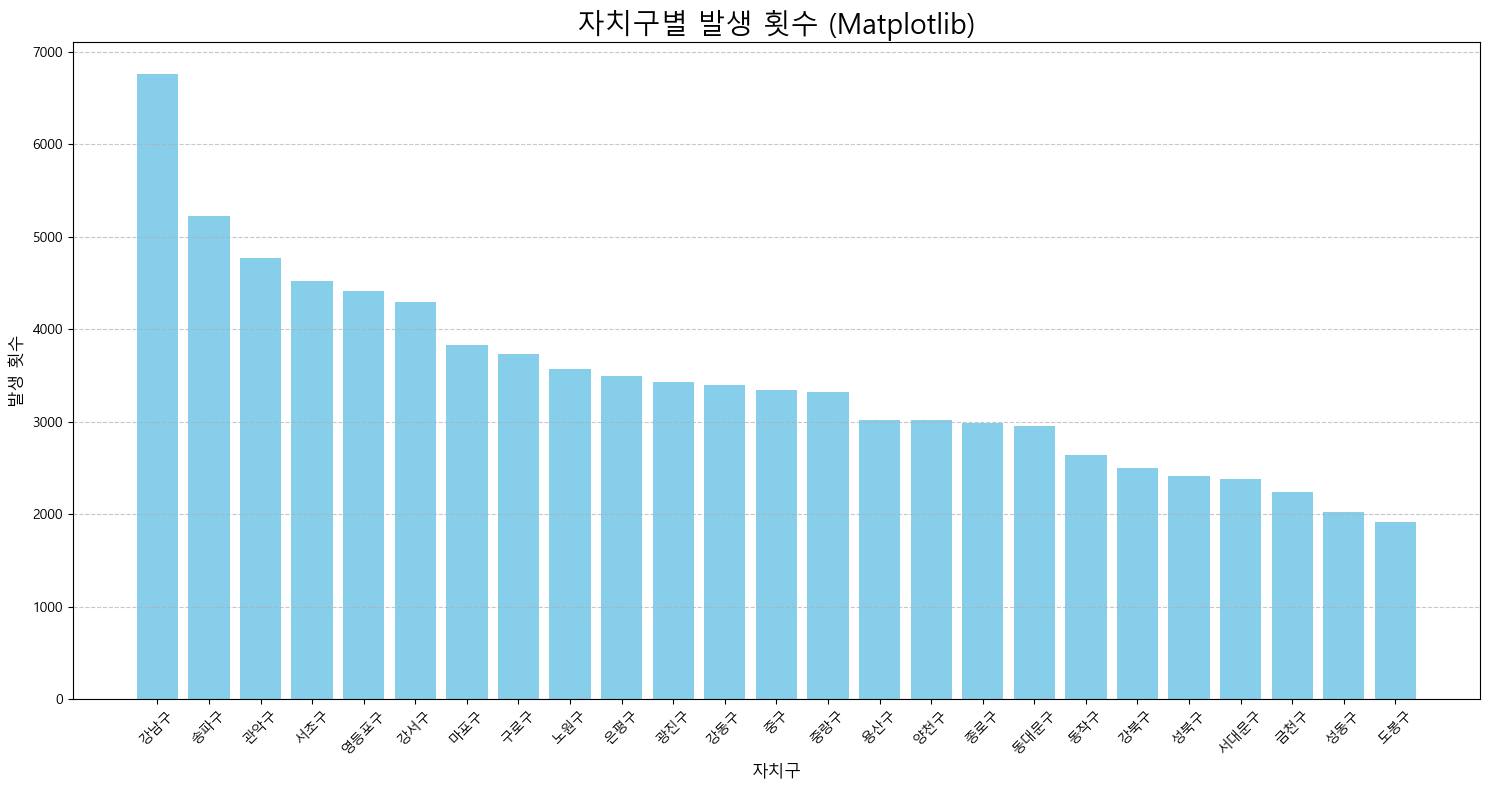

In [53]:
# 3. Matplotlib으로 막대 그래프 그리기
print("--- 1. Matplotlib 그래프 생성 ---")
plt.figure(figsize=(15, 8))
plt.bar(df_sorted['자치구'], df_sorted['발생 횟수'], color='skyblue')
plt.title('자치구별 발생 횟수 (Matplotlib)', fontsize=20)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('발생 횟수', fontsize=12)
plt.xticks(rotation=45) # x축 라벨 45도 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # 레이아웃 최적화
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3744\1317513698.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




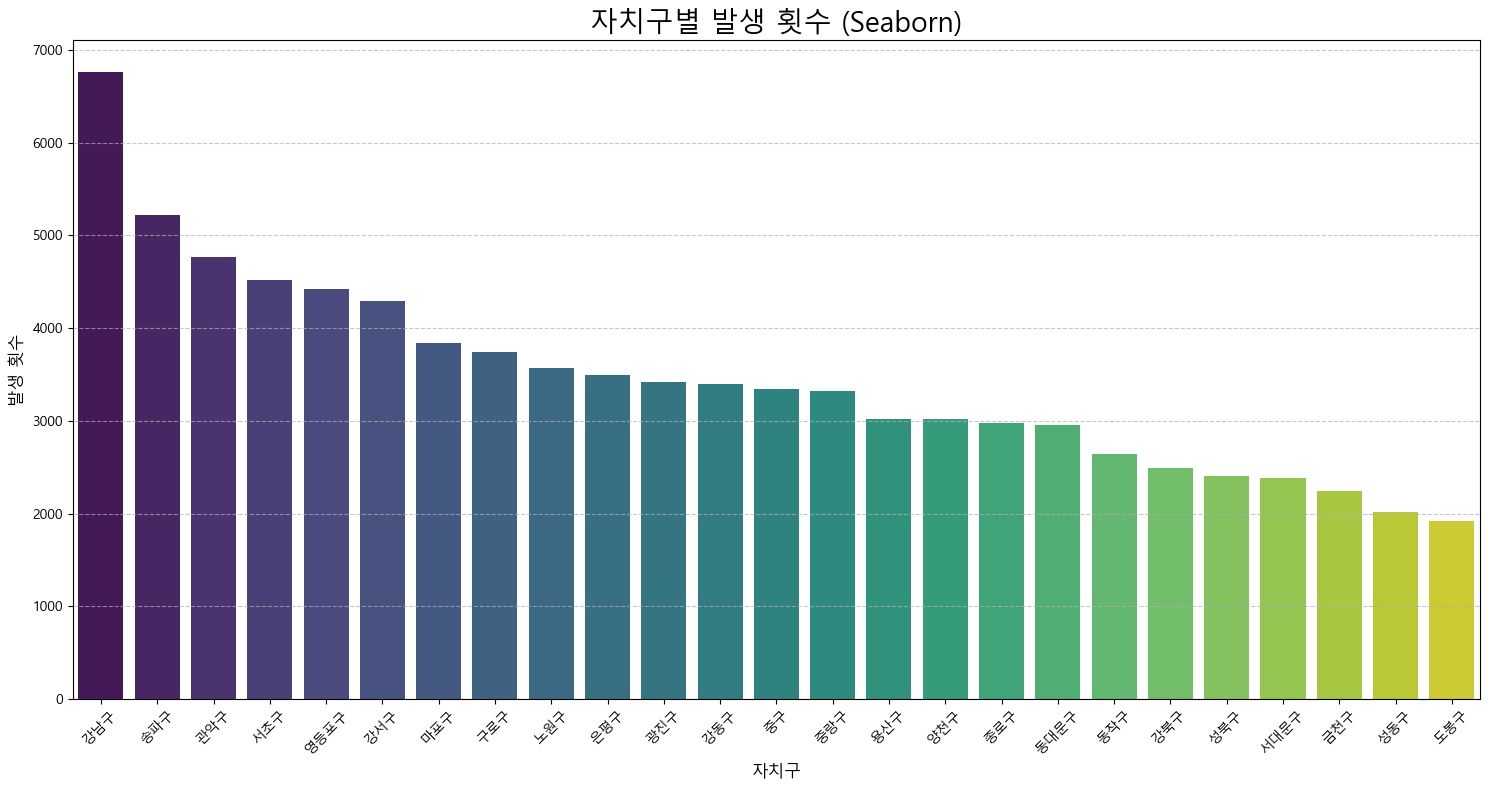

In [54]:
plt.figure(figsize=(15, 8))
sns.barplot(x='자치구', y='발생 횟수', data=df_sorted, palette='viridis')
plt.title('자치구별 발생 횟수 (Seaborn)', fontsize=20)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('발생 횟수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [76]:
# 5. Plotly.graph_objects로 인터랙티브 막대 그래프 그리기
# Plotly는 기본적으로 유니코드(한글 포함)를 잘 지원하여 별도 설정이 필요 없는 경우가 많습니다.
print("\n--- 3. Plotly.graph_objects 그래프 생성 ---")
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_sorted['자치구'],
    y=df_sorted['발생 횟수'],
    marker_color='indianred',
    text=df_sorted['발생 횟수'],
    textposition='auto',
))

fig.update_layout(
    title={
        'text': '<b>자치구별 발생 횟수 (Plotly)</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    xaxis_title='자치구',
    yaxis_title='발생 횟수',
    xaxis_tickangle=-45,
    font=dict(
        family="Malgun Gothic, AppleGothic, NanumGothic, sans-serif", # 시스템에 맞는 폰트 우선 적용
        size=12
    ),
    plot_bgcolor='rgba(0,0,0,0)', # 배경 투명
    yaxis=dict(gridcolor='lightgrey'), # y축 그리드 색상
)

fig.show()



--- 3. Plotly.graph_objects 그래프 생성 ---


# df_year

In [91]:
# 데이터 불러오기
df_year = pd.read_csv("data/crime2.csv")  # CSV 파일 경로

In [92]:
df_year

,자치구별,2019년,2020년,2021년,2022년,2023년
0,종로구,3846,3102,2712,3138,2981
1,중구,4327,3411,2861,3071,3348
2,용산구,3313,2969,2381,2967,3021
3,성동구,2512,2362,2112,2194,2023
4,광진구,4011,3601,3087,3619,3424
5,동대문구,3692,3401,2959,3253,2957
6,중랑구,4268,3726,3210,3599,3324
7,성북구,2877,2567,2411,2749,2411
8,강북구,3838,2770,2301,2832,2497
9,도봉구,2110,2179,1860,2141,1921


In [93]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구별    25 non-null     object
 1   2019년   25 non-null     int64 
 2   2020년   25 non-null     int64 
 3   2021년   25 non-null     int64 
 4   2022년   25 non-null     int64 
 5   2023년   25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [94]:
# 1. 타입을 변경할 컬럼 이름들을 리스트로 만듭니다.
columns_to_convert = ['2019년', '2020년', '2021년', '2022년', '2023년']

# 2. for 반복문을 사용해 df_year의 각 컬럼 타입을 int로 변경합니다.
for column in columns_to_convert:
    df_year[column] = pd.to_numeric(df_year[column])

# 3. 변경된 데이터 타입을 확인합니다.
print(df_year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구별    25 non-null     object
 1   2019년   25 non-null     int64 
 2   2020년   25 non-null     int64 
 3   2021년   25 non-null     int64 
 4   2022년   25 non-null     int64 
 5   2023년   25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
None


In [ ]:
# --- 5. Plotly로 애니메이션 그래프 그리기 ---
print("\n--- 3. Plotly로 애니메이션 그래프 생성 ---")
# Plotly에 적합한 형태로 데이터 구조 변경 (Wide to Long)
df_long = pd.melt(df_year,
                  id_vars=['자치구별'],
                  var_name='년도',
                  value_name='발생 횟수')

# 년도별로 정렬
df_long = df_long.sort_values(by=['년도', '발생 횟수'], ascending=[True, False])

fig = px.bar(df_long,
             x='자치구별',
             y='발생 횟수',
             color='자치구별',
             animation_frame='년도', # 이 옵션이 애니메이션을 만듭니다.
             title='<b>년도별 서울시 자치구 범죄 발생 건수</b>',
             labels={'자치구별': '자치구', '발생 횟수': '발생 건수'},
             color_discrete_sequence=px.colors.qualitative.Vivid)

# 애니메이션이 부드럽게 보이도록 y축 범위 고정
fig.update_yaxes(range=[0, df_long['발생 횟수'].max() * 1.6])

# 레이아웃 및 폰트 설정
fig.update_layout(
    title_x=0.5,
    font=dict(family="Malgun Gothic, AppleGothic, NanumGothic, sans-serif", size=12),
    xaxis={'categoryorder':'total descending'} # 각 년도마다 막대를 내림차순으로 정렬
)

# --- 애니메이션 속도 조절 (수정된 부분) ---
# Plotly가 자동으로 생성한 플레이 버튼의 애니메이션 속성값을 변경합니다.
# duration: 각 프레임(년도)이 표시되는 시간 (1000ms = 1초)
# transition: 프레임 간 전환(애니메이션)에 걸리는 시간 (500ms = 0.5초)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

fig.show()


--- 3. Plotly로 애니메이션 그래프 생성 ---
